In [512]:

import sys
import os
project_root = os.path.abspath("..")
sys.path.append(os.path.join(project_root, "src"))

In [513]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
from core.data import load_from_kaggle


In [514]:
dataset_link = "danilzyryanov/crime-in-berlin-2012-2019" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/crime-in-berlin-2012-2019' already exists with files. Skipping download (replace=False).


In [515]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.tail()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218
1199,2019,Reinickendorf,129900,"Bezirk (Rd), nicht zuzuordnen",3,2,14,7,4,59,0,7,15,0,1,0,7,3,9,21


In [516]:
#from pickletools import uint1


#headers = {"User-Agent": "berlin-crime-analysis (bytewalker1972@gmail.com)"}
#url = "https://nominatim.openstreetmap.org/search"


#def kompass_raus(location):         #Openstreetmap mag keine Himmelsrichtnugen
#    kompassrose=[
#        "nördliche","südliche","östliche","westliche",
#        "Nordost", "Nordwest", "Südost", "Südwest",
#        "nord","ost","süd","west"       
#        ]   
#    ortsteil = str(location).lower() #Buchstaben klein machen
#    ortsteil= ortsteil.replace("-", " ")   #"-" raus
#    ortsteil = ortsteil.replace("_", " ")   #"_"
#    ortsteil = " ".join(ortsteil.split())
#    #print(ortsteil)
#    woerter=ortsteil.split()
#    woerter = [w for w in woerter if w not in kompassrose]
#    return " ".join(woerter)
#kompass_raus("Südliche-Lanke")






    
    
#unique_loc =(df["Location"]).unique()
#ende=len(unique_loc)
#for idx in range(0,ende):
#    #print(unique_loc[idx])
#    richtig=kompass_raus(unique_loc[idx])
#    print(richtig)


In [517]:
#headers = {"User-Agent": "berlin-crime-analysis (bytewalker1972@gmail.com)"}
#url = "https://nominatim.openstreetmap.org/search"

#geo_lex={}
#for idx in range(0,ende):                  #Lexikon aufbauen: Format Key=Ortsteil_Name, latitude, longitude
#    location=(unique_loc[idx])
#    clean_location = kompass_raus(location)
#    params = {                               #Abfrage zieht den die Koordinaten aus Openstreetmap
#        "q": f"{clean_location}, Berlin, Germany", #Hier den Ortsteil, nebst Berlin und Germany abfragen, um nicht in einem Berlin in den USA zu landen
#        "format": "json",               
#        "limit": 1                           #Nur die beste Abfrage nehmen
#    }
#    response = requests.get(url, params=params, headers=headers)
#    jeweilige_koordinaten = response.json()
#    if not jeweilige_koordinaten:
#        print("Nichts gefunden",location)
#        time.sleep(3)
#        continue
#    latitude=float(jeweilige_koordinaten[0]["lat"])
#    longitude=float(jeweilige_koordinaten[0]["lon"])
#    geo_lex[location]={"latitude":latitude,"longitude":longitude}
#time.sleep(3)
#for location, koor_paar in geo_lex.items():
#    print(location, koor_paar["latitude"], koor_paar["longitude"])
#time.sleep(3)

In [518]:
df.head(1)

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032


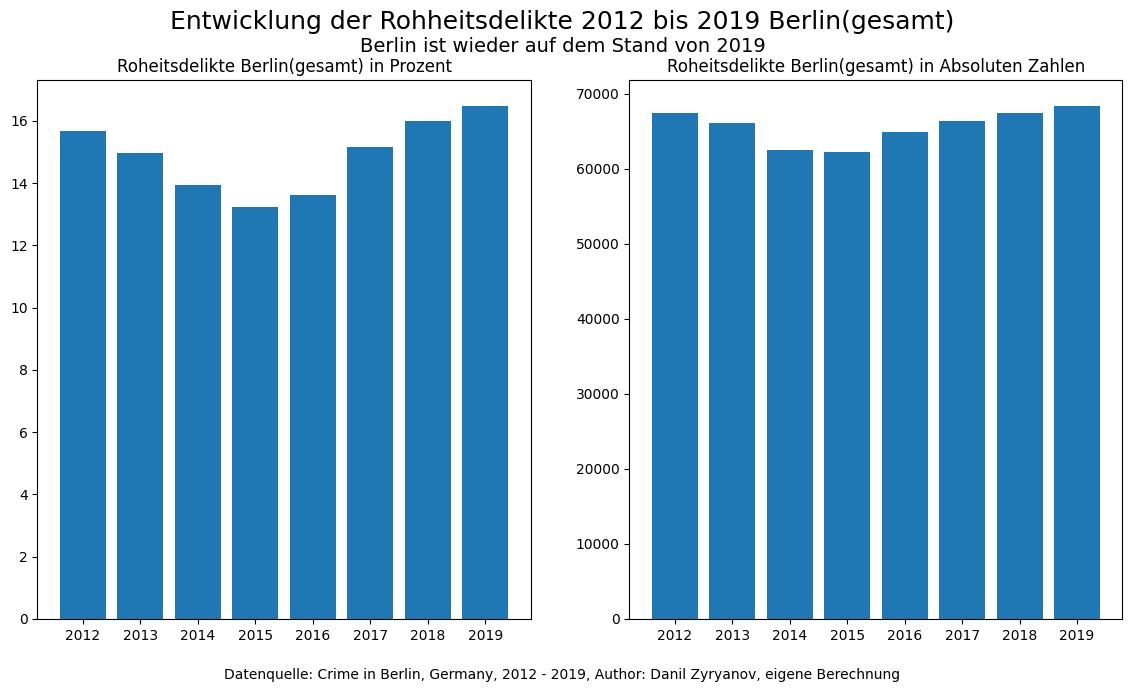

In [519]:
#Ziel: Idenfikation von bestimmten Kriminalitäts-Hotspots
#Daher kein Vergleich mit Kriminalitätsbelastung,
#sondern wie hoch sind die Anteile bei bestimmten Deliktsgruppen: Deliktsgruppe: Gesamtzahl Delikte /

df_Roh=pd.DataFrame()                       #Rohheitsdelikte
df_Roh["Jahr"]=df["Year"]                   #Jahr
df_Roh["Bezirk"]=df["District"]             #Bezirk
df_Roh["Revier"]=df["Location"]             #Sogenannte LOR-Gebiete in Berlin gleichzeitig Polizeirevier != Stadtteil oder Ortsteil
df_Roh["Verbal"]=df["Threat"]               #Bedrohung, Nötigung, Nachstellungen("Stalking")
df_Roh["l_KV"]=df["Injury"]                 #Leichte KV(max. Ambulante Behandlung)
df_Roh["s_KV"]=df["Agg_assault"]
df_Roh["Summe_Roh"]=df["Threat"]+df["Injury"]+df["Agg_assault"]         #Summe der Rohheitsdelikte (Nach meiner Definition)
df_Roh["Summe_Delikte"]=(df["Robbery"]+df["Street_robbery"]+
                          df["Injury"]+df["Agg_assault"]+df["Threat"]+
                          df["Theft"]+df["Car"]+df["From_car"]+df["Bike"]+df["Burglary"]+
                          df["Damage"]+df["Graffiti"]+df["Drugs"]
                          )
df_Roh["Roh_Prozent"]=(df_Roh["Summe_Roh"]/df_Roh["Summe_Delikte"])*100

#Anteil der Roheitsdelikte in Berlin gesamt, Zeitraum 2012 bis 2019
Roh_Anteil_Berlin=(df_Roh.groupby("Jahr")[["Summe_Roh", "Summe_Delikte"]].sum()) ###Absolut Werte summieren"
Roh_Anteil_Berlin["Prozent"]=(Roh_Anteil_Berlin["Summe_Roh"]/Roh_Anteil_Berlin["Summe_Delikte"])*100 #Prozent

fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(14, 7))

axes[0].bar(Roh_Anteil_Berlin.index, Roh_Anteil_Berlin["Prozent"])
axes[0].set_title("Roheitsdelikte Berlin(gesamt) in Prozent")
axes[1].bar(Roh_Anteil_Berlin.index, Roh_Anteil_Berlin["Summe_Roh"])
axes[1].set_title("Roheitsdelikte Berlin(gesamt) in Absoluten Zahlen")
fig.suptitle("Entwicklung der Rohheitsdelikte 2012 bis 2019 Berlin(gesamt)",fontsize=18)

fig.text(
       0.5,0.92,"Berlin ist wieder auf dem Stand von 2019", ha="center", fontsize=14)
        
fig.text(0.5, 0.02,
         "Datenquelle: Crime in Berlin, Germany, 2012 - 2019, Author: Danil Zyryanov, eigene Berechnung",
         ha="center",
         va="bottom"
         )

plt.savefig("/Users/susannedavid/Code/Slide 1_Entwicklung_gesamt_Roheitsdelikte.png")
plt.show()





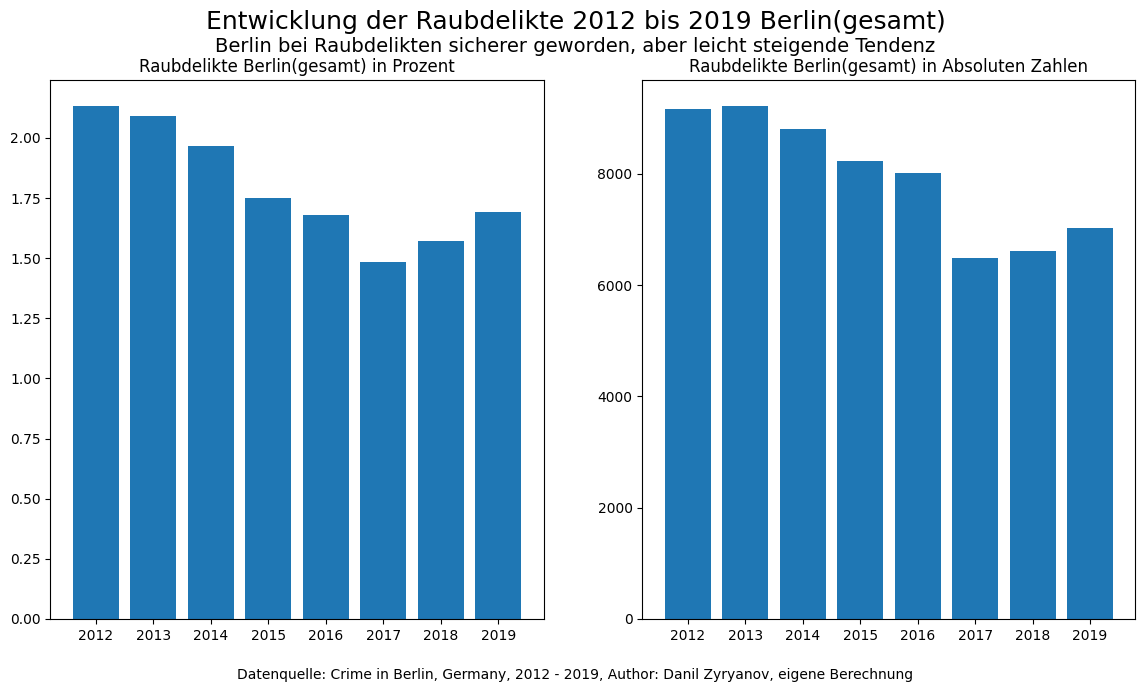

In [520]:
#Betrachtung der Raubdelikte Berlin gesamt
df_Raub=pd.DataFrame()                       #Eigentumsdelikte
df_Raub["Jahr"]=df["Year"]                   #Jahr
df_Raub["Bezirk"]=df["District"]             #Bezirk
df_Raub["Revier"]=df["Location"]             #Sogenannte LOR-Gebiete in Berlin gleichzeitig Polizeirevier != Stadtteil oder Ortsteil
df_Raub["Raub"]=df["Robbery"]                #Vermutlich Überfälle auf Banken, Läden und Geldboten am Automaten
df_Raub["Straßenraub"]=df["Street_robbery"]  #Überfälle auf der Straße
df_Raub["Summe_Raub"]=df["Robbery"]+df["Street_robbery"]         #Summe der Rohheitsdelikte (Nach meiner Definition)
df_Raub["Summe_Delikte"]=(df["Robbery"]+df["Street_robbery"]+
                          df["Injury"]+df["Agg_assault"]+df["Threat"]+
                          df["Theft"]+df["Car"]+df["From_car"]+df["Bike"]+df["Burglary"]+
                          df["Damage"]+df["Graffiti"]+df["Drugs"]
                          )

df_Raub["Raub_Prozent"]=(df_Raub["Summe_Raub"]/df_Raub["Summe_Delikte"])*100

#Anteil der Raubdelikte in Berlin gesamt, Zeitraum 2012 bis 2019
Raub_Anteil_Berlin=(df_Raub.groupby("Jahr")[["Summe_Raub", "Summe_Delikte"]].sum()) ###Absolut Werte summieren"
Raub_Anteil_Berlin["Prozent"]=(Raub_Anteil_Berlin["Summe_Raub"]/Raub_Anteil_Berlin["Summe_Delikte"])*100 #Prozent

fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(14, 7))

axes[0].bar(Raub_Anteil_Berlin.index, Raub_Anteil_Berlin["Prozent"])
axes[0].set_title("Raubdelikte Berlin(gesamt) in Prozent")
axes[1].bar(Raub_Anteil_Berlin.index, Raub_Anteil_Berlin["Summe_Raub"])
axes[1].set_title("Raubdelikte Berlin(gesamt) in Absoluten Zahlen")
fig.suptitle("Entwicklung der Raubdelikte 2012 bis 2019 Berlin(gesamt)",fontsize=18)

fig.text(
        0.5,0.92,"Berlin bei Raubdelikten sicherer geworden, aber leicht steigende Tendenz", ha="center", fontsize=14)
        
fig.text(0.5, 0.02,
         "Datenquelle: Crime in Berlin, Germany, 2012 - 2019, Author: Danil Zyryanov, eigene Berechnung",
         ha="center",
         va="bottom"
         )

plt.savefig("/Users/susannedavid/Code/Slide 2_Entwicklung_gesamt_Raubdelikte.png")
#plt.show()


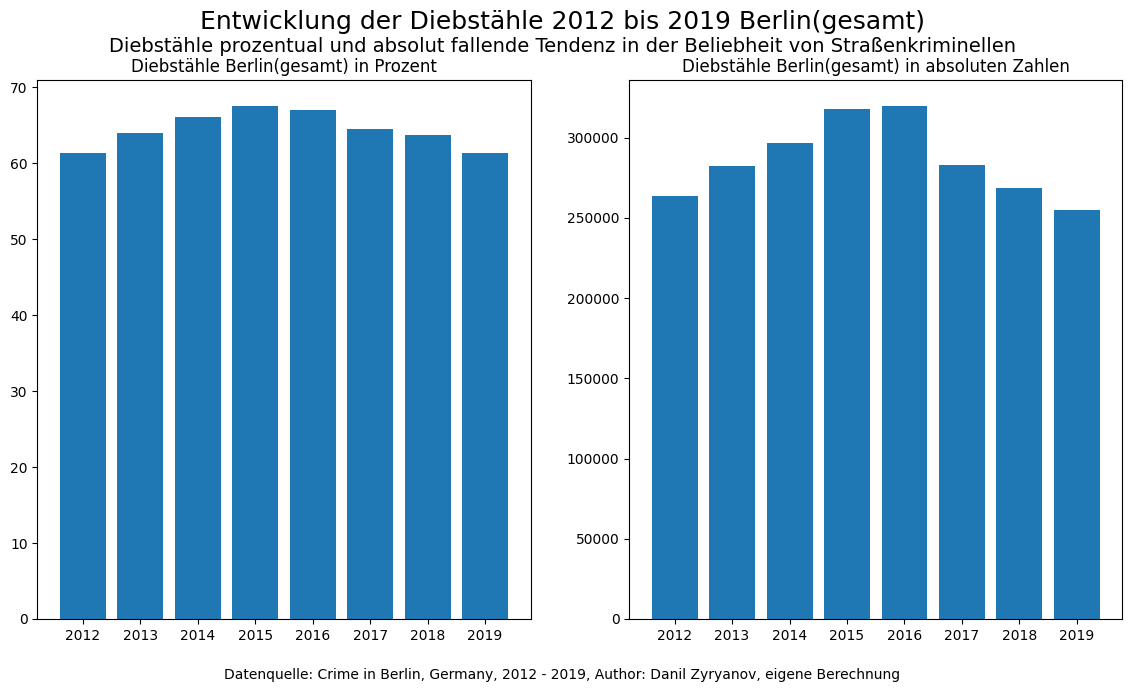

In [521]:
#Betrachtung der Diebstahlsdelikte Berlin gesamt
df_Klau=pd.DataFrame()                       #Eigentumsdelikte
df_Klau["Jahr"]=df["Year"]                   #Jahr
df_Klau["Bezirk"]=df["District"]             #Bezirk
df_Klau["Revier"]=df["Location"]             #Sogenannte LOR-Gebiete in Berlin gleichzeitig Polizeirevier != Stadtteil oder Ortsteil
df_Klau["Diebstahl"]=df["Theft"]             #Allgemeiner Diebstahl: Klauen, Taschendiebstahl und wohl auch Ladendiebstahl(Hohe Anzeigequote, wegen Versicherung)
df_Klau["Sachen_aus_Auto"]=df["From_car"]  #Überfälle auf der Straße
df_Klau["Rad_Dieb"]=df["Bike"]
df_Klau["Summe_Dieb"]=df_Klau["Diebstahl"]+df_Klau["Sachen_aus_Auto"]+df_Klau["Rad_Dieb"]         #Summe der Rohheitsdelikte (Nach meiner Definition)
df_Klau["Summe_Delikte"]=(df["Robbery"]+df["Street_robbery"]+
                          df["Injury"]+df["Agg_assault"]+df["Threat"]+
                          df["Theft"]+df["Car"]+df["From_car"]+df["Bike"]+df["Burglary"]+
                          df["Damage"]+df["Graffiti"]+df["Drugs"]
                          )

df_Klau["Dieb_Prozent"]=(df_Klau["Summe_Dieb"]/df_Klau["Summe_Delikte"])*100

#Anteil der Raubdelikte in Berlin gesamt, Zeitraum 2012 bis 2019
Klau_Anteil_Berlin=(df_Klau.groupby("Jahr")[["Summe_Dieb", "Summe_Delikte"]].sum()) ###Absolut Werte summieren"
Klau_Anteil_Berlin["Prozent"]=(Klau_Anteil_Berlin["Summe_Dieb"]/Klau_Anteil_Berlin["Summe_Delikte"])*100 #Prozent
df_Klau
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(14, 7))

axes[0].bar(Klau_Anteil_Berlin.index, Klau_Anteil_Berlin["Prozent"])
axes[0].set_title("Diebstähle Berlin(gesamt) in Prozent")
axes[1].bar(Klau_Anteil_Berlin.index, Klau_Anteil_Berlin["Summe_Dieb"])
axes[1].set_title("Diebstähle Berlin(gesamt) in absoluten Zahlen")
fig.suptitle("Entwicklung der Diebstähle 2012 bis 2019 Berlin(gesamt)",fontsize=18)

fig.text(
        0.5,0.92,"Diebstähle prozentual und absolut fallende Tendenz in der Beliebheit von Straßenkriminellen", ha="center", fontsize=14)
        
fig.text(0.5, 0.02,
         "Datenquelle: Crime in Berlin, Germany, 2012 - 2019, Author: Danil Zyryanov, eigene Berechnung",
         ha="center",
         va="bottom"
         )

plt.savefig("/Users/susannedavid/Code/Slide 3_Entwicklung_gesamt_Diebstahl.png")
plt.show()


16
2
61


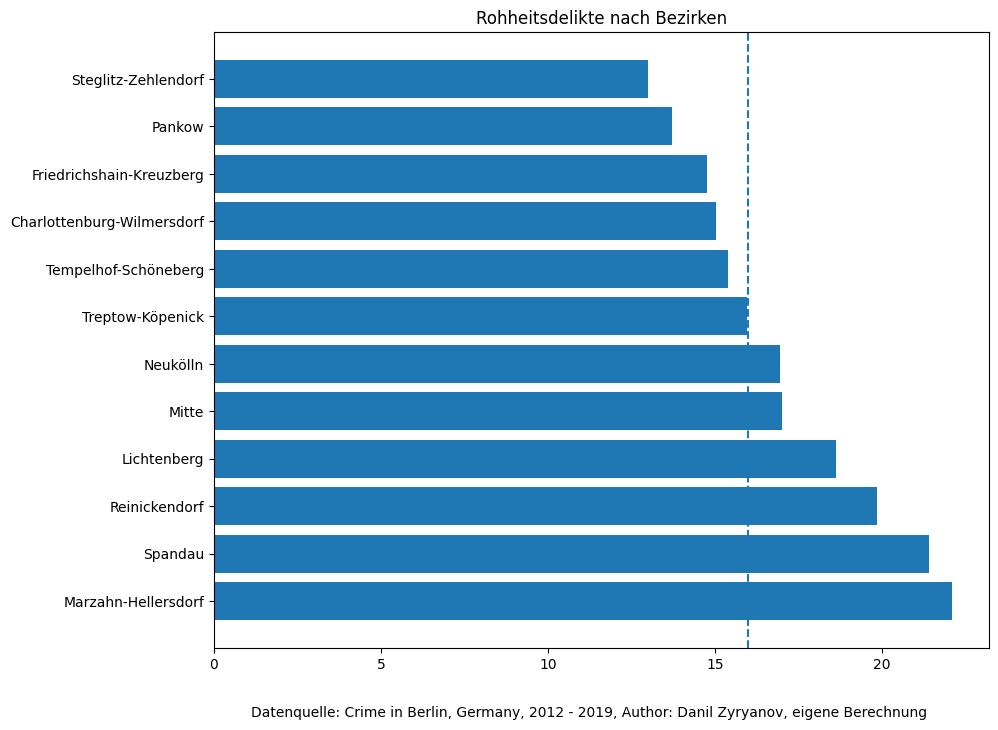

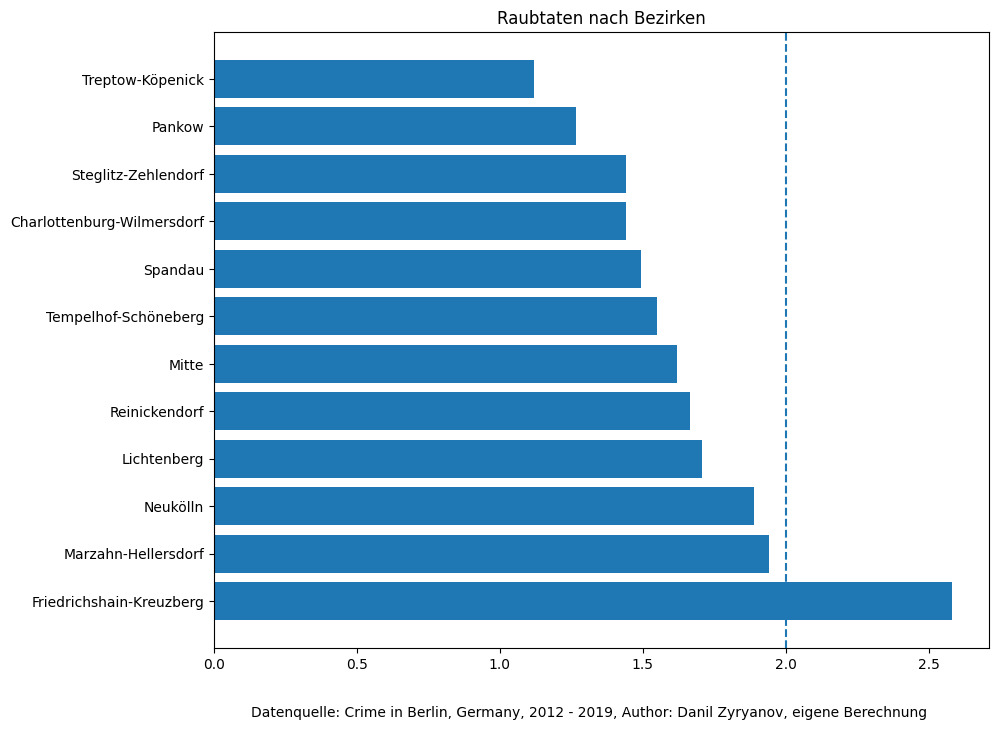

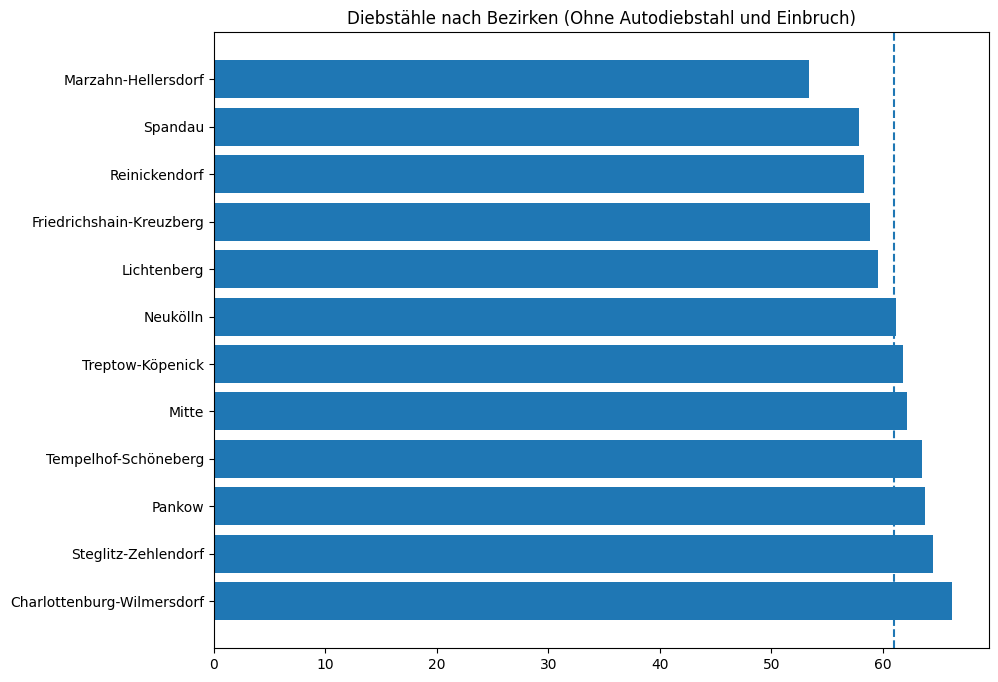

In [522]:
#Den aktuellen Median(Prozent aus Gesamtberlin) in den drei Deliktsgruppen als Benchmark für die Bezirke
#Median_Prozent_2019 in Berlin bei Rohheitsdelikten
#Median bei Roh-Delikten in Prozent Berlin gesamt
from matplotlib.pyplot import axvline


df_Roh_aktuell=df_Roh[df_Roh["Jahr"]==2019]
Roh_Median=df_Roh_aktuell["Roh_Prozent"].median()
Roh_Median=round(Roh_Median)
print(Roh_Median)

#Dito Raub
df_Raub_aktuell=df_Raub[df_Raub["Jahr"]==2019]
Raub_Median=df_Raub_aktuell["Raub_Prozent"].median()
Raub_Median=round(Raub_Median)
print(Raub_Median)

#Median bei Diebstahl-Delikten in Prozent Berlin gesamt
df_Klau_aktuell=df_Klau[df_Klau["Jahr"]==2019]
Klau_Median=df_Klau_aktuell["Dieb_Prozent"].median()
Klau_Median=round(Klau_Median)
print(Klau_Median)

#Welche Bezirke liegen bei Roh über den Median?

Roh_Bezirk=df_Roh_aktuell.groupby(df_Roh_aktuell["Bezirk"])[["Summe_Roh","Summe_Delikte"]].sum()
Roh_Bezirk["Roh_Prozent"]=(Roh_Bezirk["Summe_Roh"]/Roh_Bezirk["Summe_Delikte"])*100
Roh_Bezirk=Roh_Bezirk.sort_values("Roh_Prozent", ascending=False)
#Roh_Bezirk


#Welche Bezirke liegen Raub über den Median?
Raub_Bezirk=df_Raub_aktuell.groupby(df_Raub_aktuell["Bezirk"])[["Summe_Raub","Summe_Delikte"]].sum()
Raub_Bezirk["Raub_Prozent"]=(Raub_Bezirk["Summe_Raub"]/Raub_Bezirk["Summe_Delikte"])*100
Raub_Bezirk=Raub_Bezirk.sort_values("Raub_Prozent", ascending=False)
Raub_Bezirk

#Welche Bezirke liegen bei Klau über den Median?
Klau_Bezirk=df_Klau_aktuell.groupby(df_Klau_aktuell["Bezirk"])[["Summe_Dieb","Summe_Delikte"]].sum()
Klau_Bezirk["Dieb_Prozent"]=(Klau_Bezirk["Summe_Dieb"]/Klau_Bezirk["Summe_Delikte"])*100
Klau_Bezirk=Klau_Bezirk.sort_values("Dieb_Prozent", ascending=False)






fig, ax = plt.subplots(figsize=(10,8))
ax.barh(Roh_Bezirk.index, Roh_Bezirk["Roh_Prozent"])
ax.set_title("Rohheitsdelikte nach Bezirken")
ax.axvline(Roh_Median, linestyle="--")
fig.text(0.5, 0.02,
        "Datenquelle: Crime in Berlin, Germany, 2012 - 2019, Author: Danil Zyryanov, eigene Berechnung",
         ha="center",
         va="bottom"
         )
plt.savefig("/Users/susannedavid/Code/Slide 4_Bezirke_Roh")
plt.show()
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(Raub_Bezirk.index, Raub_Bezirk["Raub_Prozent"])
ax.set_title("Raubtaten nach Bezirken")
ax.axvline(Raub_Median, linestyle="--")
fig.text(0.5, 0.02,
        "Datenquelle: Crime in Berlin, Germany, 2012 - 2019, Author: Danil Zyryanov, eigene Berechnung",
         ha="center",
         va="bottom"
         )
plt.savefig("/Users/susannedavid/Code/Slide 5_Bezirke_Raub.png")
#plt.show()
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(Klau_Bezirk.index, Klau_Bezirk["Dieb_Prozent"])
ax.axvline(Klau_Median, linestyle="--")
ax.set_title("Diebstähle nach Bezirken (Ohne Autodiebstahl und Einbruch)")
plt.savefig("/Users/susannedavid/Code/Slide 6_Bezirke_Klau.png")
plt.show()



#fig.suptitle("Belastung der Bezirke nach Deliktsgruppen / Benchmark Median der prozentualen Belastung aller Reviere in Berlin",fontsize=14, x=0.5, ha="center")
#fig.text(0.5, 0.02,
#         "Datenquelle: Crime in Berlin, Germany, 2012 - 2019, Author: Danil Zyryanov, eigene Berechnung",
#         ha="center",
#         va="bottom"
#         )
#plt.savefig("/Users/susannedavid/Code/Slide 4_Bezirke.png")
#plt.show()

In [523]:
#Orte mit der stärksten Belastung in absoluten Zahlen: Wo hin, welcher spezialisierten Fahnder schicken?
df_Roh_aktuell.sort_values("Summe_Roh", ascending=False).head(10)
df_Raub_aktuell.sort_values("Summe_Raub", ascending=False).head(10)
df_Klau_aktuell.sort_values("Summe_Dieb", ascending=False).head(10)


,Jahr,Bezirk,Revier,Diebstahl,Sachen_aus_Auto,Rad_Dieb,Summe_Dieb,Summe_Delikte,Dieb_Prozent
1052,2019,Mitte,Alexanderplatz,11233,587,940,12760,18942,67.363531
1062,2019,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,5797,525,1182,7504,11734,63.950912
1124,2019,Tempelhof-Schöneberg,Schöneberg-Nord,4691,383,642,5716,8563,66.752306
1133,2019,Neukölln,Neuköllner Mitte/Zentrum,4680,458,388,5526,8273,66.795600
1068,2019,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,4273,259,775,5307,9859,53.828989
1127,2019,Tempelhof-Schöneberg,Tempelhof,3816,698,407,4921,8024,61.328514
1061,2019,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,3973,447,483,4903,7798,62.875096
1095,2019,Charlottenburg-Wilmersdorf,Kurfürstendamm,4001,286,220,4507,6576,68.537105
1134,2019,Neukölln,Reuterstraße,3413,296,628,4337,6795,63.826343
1055,2019,Mitte,Moabit Ost,3672,240,350,4262,6701,63.602447


In [524]:
###Wo gab es seit 2012 die stärkste Veränderung in dem Anzeigeverhalten in Prozent
#roh_2019 = df_Roh[df_Roh["Jahr"] == 2019][["Revier", "Roh_Prozent"]]

#roh_2012 = df_Roh[df_Roh["Jahr"] == 2012][["Revier", "Roh_Prozent"]]
#roh_veraenderung=roh_2019.merge("Roh_Prozent": "Roh_2012")

###Hilf_DF bauen
roh_2019 = df_Roh[df_Roh["Jahr"] == 2019][["Revier", "Roh_Prozent"]] ###Alle 2019 Daten holen
roh_2019.columns = ["Revier", "Roh_2019"]                            ###Zeile in Roh2019 umbenennen, damit von Roh 2012 unterscheidbar

roh_2012 = df_Roh[df_Roh["Jahr"] == 2012][["Revier", "Roh_Prozent"]] ### dito 2012
roh_2012.columns = ["Revier", "Roh_2012"]         

roh_veraenderung = roh_2019.merge(roh_2012, on="Revier") ### nun den eigentlichen df bauen

roh_veraenderung["Differenz"]=roh_veraenderung["Roh_2019"]-roh_veraenderung["Roh_2012"] #Differenz feststellen
roh_veraenderung.sort_values(by="Differenz", ascending=False).head(10) #Differenz absteigend sortieren


,Revier,Roh_2019,Roh_2012,Differenz
53,Forst Grunewald,29.032258,9.139785,19.892473
104,Schmöckwitz/Karolinenhof/Rauchfangswerder,21.084337,6.834532,14.249805
64,"Bezirk (Sp), nicht zuzuordnen",21.739130,8.981233,12.757897
73,"Bezirk (St-Zd), nicht zuzuordnen",21.739130,9.078772,12.660359
113,"Bezirk (Tp-Kp), nicht zuzuordnen",25.581395,13.526971,12.054424
20,Buch,22.785548,12.331503,10.454045
146,MV 1 - Märkisches Viertel,29.383712,19.427890,9.955822
91,Rudow,21.628608,11.972318,9.656290
107,Altstadt-Kietz,27.062706,18.407960,8.654746
63,Gatow/Kladow,20.616114,12.083333,8.532780


<Axes: xlabel='Year'>

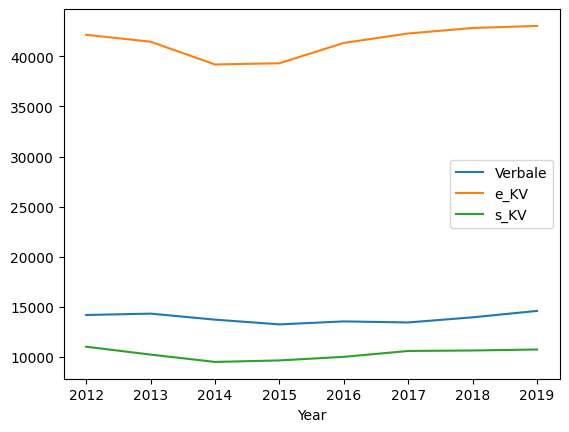

In [525]:
#Arbeitshyptose: Übergang von eher "beruhigenden" Heroin zu aufputschenden Amphetaminen führt zu mehr Roheitsdelikten
#Verbalattacken, S_KV und e_KV werden zu Roheitsdelikten zusammengefasst
df_Roheits=pd.DataFrame()
df_Roheits["Verbale"]=df.groupby("Year")["Threat"].sum()        ##Verbale Bedrohung/Nötigung
df_Roheits["e_KV"]=df.groupby("Year")["Injury"].sum()           ##Übliche KV mit eher leichteren Verletzungen (Kein Krankenhaus)
df_Roheits["s_KV"]=df.groupby("Year")["Agg_assault"].sum()      ##Schwere körperliche Angriffe(Wahrscheinlich die Krankenhaus erfordern)
df_Roheits

df_Roheits["Summe"]=df_Roheits["Verbale"]+df_Roheits["e_KV"]+df_Roheits["s_KV"]
df_Roheits[["Verbale","e_KV","s_KV"]].plot()

#df_crime["Drogen"] = df.groupby("Year")["Drugs"].sum()                      
#df_crime["Aggression"]= df.groupby("Year")["Agg_assault"].sum()
#df_crime


In [526]:
from re import A


display(
    "Shape",A
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3093217495.py, line 5)

In [ ]:
fig, ax = plt.subplots(figsize=(24, 20), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);